In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
train = pd.read_csv('Lianjia-021118.csv')

In [3]:
train['EAST'] = train['EAST'].apply(str)
train['SOUTH'] = train['SOUTH'].apply(str)
train['WEST'] = train['WEST'].apply(str)
train['NORTH'] = train['NORTH'].apply(str)
train['TMREG'] = train['TMREG'].apply(str)
train['TMLAST'] = train['TMLAST'].apply(str)
train['ANYTIME'] = train['ANYTIME'].apply(str)

X = train.copy()

In [4]:
train.drop('ID', axis = 1, inplace = True)
train.drop("TITLE", axis = 1, inplace = True)
train.drop("IAREA", axis = 1, inplace = True)

In [5]:
print('Train data shape: ', train.shape)

Train data shape:  (65432, 35)


In [6]:
train.head()

,P,PPS,NEI,DIS,STREET,METRO,STATION,RM,DRM,KIT,...,WLFT,YRIGHT,TMREG,DRIGHT,TMLAST,USE,YCONDO,CRIGHT,COPY,ANYTIME
0,2120000,38602,沙田公寓,浦东,川沙,2号线,华夏东路站,1,1,1,...,无,NaN,2018.0,商品房,2016.0,普通住宅,满两年,非共有,未上传房本照片,随时看房
1,1800000,35510,黄楼花苑,浦东,川沙,NaN,NaN,1,1,1,...,无,NaN,2017.0,商品房,1999.0,普通住宅,满五年,共有,已上传房本照片,随时看房
2,1280000,20399,丽泽荷亭苑,浦东,书院镇,NaN,NaN,1,1,1,...,无,NaN,2018.0,动迁安置房,2008.0,普通住宅,满五年,非共有,已上传房本照片,随时看房
3,4950000,87194,万邦都市花园,浦东,北蔡,2号线,龙阳路站,1,1,1,...,有,NaN,2018.0,商品房,2013.0,普通住宅,满五年,非共有,已上传房本照片,随时看房
4,2010000,52522,临沂六村,浦东,南码头,6号线,临沂新村站,1,1,1,...,无,NaN,2018.0,商品房,nan,普通住宅,未满两年,NaN,未上传房本照片,随时看房


In [7]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Skew is:  1.0646826671675382


(array([4.6690e+03, 2.1907e+04, 2.2079e+04, 1.0661e+04, 4.1640e+03,
        1.3270e+03, 4.0200e+02, 1.4800e+02, 5.4000e+01, 2.1000e+01]),
 array([  8377. ,  27515.8,  46654.6,  65793.4,  84932.2, 104071. ,
        123209.8, 142348.6, 161487.4, 180626.2, 199765. ]),
 <a list of 10 Patch objects>)

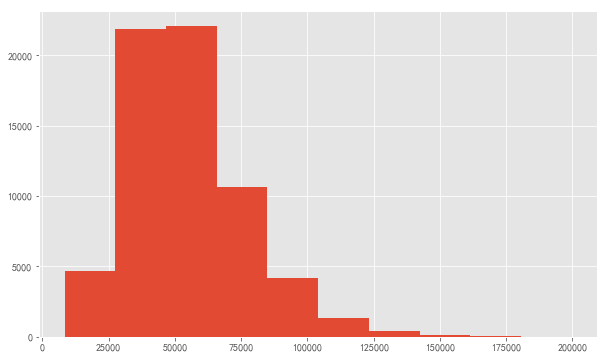

In [8]:
print('Skew is: ', train.PPS.skew())
plt.hist(train.PPS)

Log skew is:  -0.1914404140535246


(array([   57.,   161.,  1411.,  5110., 13245., 18947., 17015.,  7706.,
         1585.,   195.]),
 array([ 9.03324513,  9.35041032,  9.6675755 ,  9.98474068, 10.30190586,
        10.61907104, 10.93623623, 11.25340141, 11.57056659, 11.88773177,
        12.20489695]),
 <a list of 10 Patch objects>)

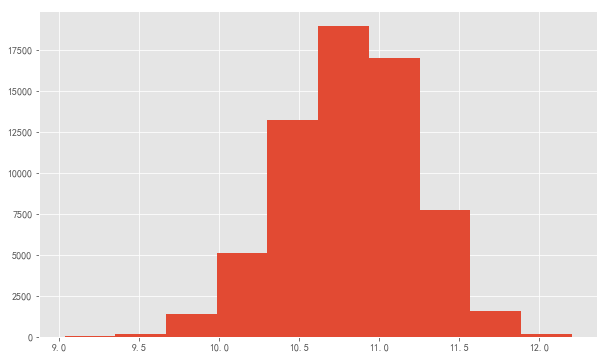

In [9]:
target = np.log(train.PPS)
print('Log skew is: ', target.skew())
plt.hist(target)

In [10]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

In [11]:
print(corr['PPS'].sort_values(ascending=False)[:5], '\n')
print(corr['PPS'].sort_values(ascending=False)[-5:])

PPS      1.000000
P        0.629225
TFLR     0.316782
LFT      0.278779
WSHRM    0.165035
Name: PPS, dtype: float64 

RTO    0.103083
KIT    0.032587
RM     0.007318
DRM    0.005560
CND   -0.003782
Name: PPS, dtype: float64


Text(0.5,0,'行政区')

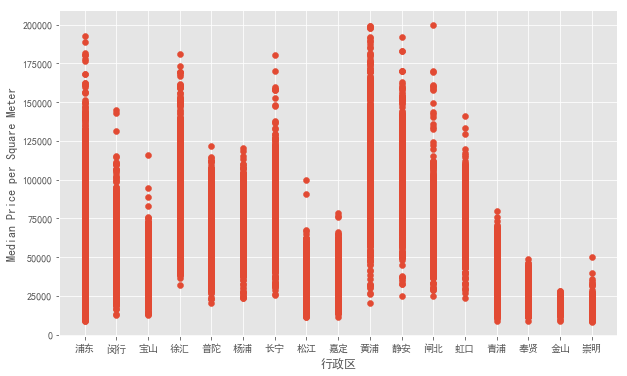

In [12]:
plt.scatter(x=train['DIS'], y=train['PPS'])
plt.ylabel('Median Price per Square Meter')
plt.xlabel('行政区')

Text(0,0.5,'Median Price per Square Meter')

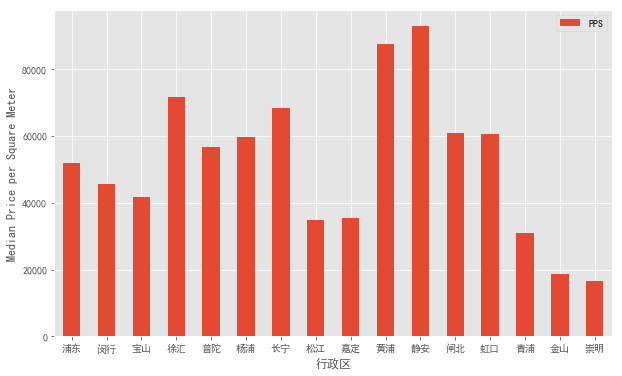

In [13]:
district_order = ['浦东', '闵行', '宝山', '徐汇', '普陀', '杨浦', '长宁', '松江', '嘉定', '黄浦', '静安', '闸北', '虹口', '青浦', '金山', '崇明']
condition_pivot = train.pivot_table(index='DIS', values='PPS', aggfunc=np.median)
condition_pivot.loc[district_order].plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('行政区')
plt.ylabel('Median Price per Square Meter')

In [14]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

         Null Count
Feature            
YRIGHT        50908
METRO         48037
STATION       48037
VSTR          29685
CRIGHT         9096
WLFT           4339
STR             577
TYPE            488
YCONDO          134
COPY              2
PPS               0
FLR               0
WSHRM             0
KIT               0
RM                0
DRM               0
NEI               0
TFLR              0
STREET            0
DIS               0
ANYTIME           0
SOUTH             0
OAREA             0
EAST              0
WEST              0


In [15]:
train["METRO"] = train["METRO"].fillna("NA")
train["STATION"] = train["STATION"].fillna("NA")
train["VSTR"] = train["VSTR"].fillna("NA")
train["TYPE"] = train["TYPE"].fillna("NA")
train["EAST"] = train["EAST"].fillna("NA")
train["SOUTH"] = train["SOUTH"].fillna("NA")
train["WEST"] = train["WEST"].fillna("NA")
train["NORTH"] = train["NORTH"].fillna("NA")
train["STR"] = train["STR"].fillna("NA")
train["WLFT"] = train["WLFT"].fillna("NA")
train["YRIGHT"] = train["YRIGHT"].fillna("NA")
train["DRIGHT"] = train["DRIGHT"].fillna("NA")
train["TMLAST"] = train["TMLAST"].fillna("NA")
train["YCONDO"] = train["YCONDO"].fillna("NA")
train["CRIGHT"] = train["CRIGHT"].fillna("NA")
train["ANYTIME"] = train["ANYTIME"].fillna("NA")

In [16]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,NEI,DIS,STREET,METRO,STATION,FLR,VSTR,TYPE,EAST,SOUTH,...,WLFT,YRIGHT,TMREG,DRIGHT,TMLAST,USE,YCONDO,CRIGHT,COPY,ANYTIME
count,65432,65432,65432,65432,65432,65432,65432,65432,65432,65432,...,65432,65432,65432,65432,65432,65432,65432,65432,65430,65432
unique,9643,17,200,16,296,3,5,5,3,3,...,3,4,7,3,44,6,4,3,2,2
top,上海康城,浦东,金桥,NA,NA,高楼层,平层,板楼,0.0,1.0,...,无,NA,2018.0,商品房,nan,普通住宅,未满两年,非共有,未上传房本照片,nan
freq,145,15246,1415,48037,48037,24907,34438,58392,60802,60904,...,35363,50908,50374,60600,43642,63385,46193,29823,47866,55638


In [17]:
print('Original: ')
print(train.DEC.value_counts())

Original: 
精装    30496
简装    16694
其他    13513
毛坯     4729
Name: DEC, dtype: int64


In [18]:
# metro_order = ['1号线', '2号线', '3号线', '4号线', '5号线', '6号线', '7号线', '8号线', '9号线', '10号线', '11号线', '12号线', '13号线', '16号线', '17号线', 'NA']
# plt.scatter(x=train['METRO'], y=train['PPS']).loc[metro_order]
# plt.ylabel('Scatter Price per Square Meter')
# plt.xlabel('Metro')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

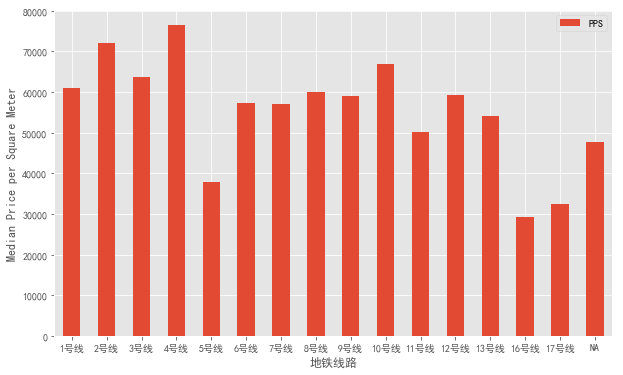

In [19]:
metro_order = ['1号线', '2号线', '3号线', '4号线', '5号线', '6号线', '7号线', '8号线', '9号线', '10号线', '11号线', '12号线', '13号线', '16号线', '17号线', 'NA']
condition_pivot = train.pivot_table(index='METRO', values='PPS', aggfunc=np.median)
condition_pivot.loc[metro_order].plot(kind='bar')
plt.xlabel('地铁线路')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

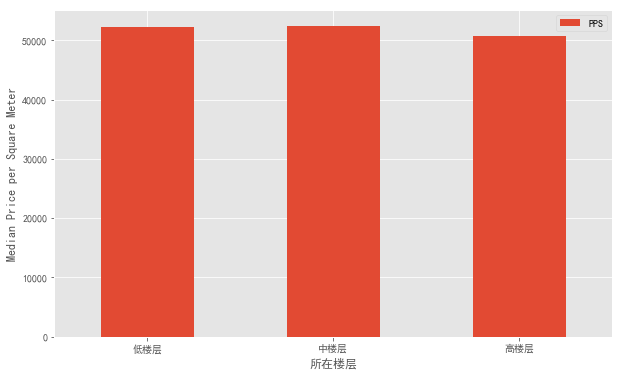

In [20]:
floor_order = ['低楼层', '中楼层', '高楼层']
condition_pivot = train.pivot_table(index='FLR', values='PPS', aggfunc=np.median)
condition_pivot.loc[floor_order].plot(kind='bar')
plt.xlabel('所在楼层')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

Text(0.5,0,'总楼层')

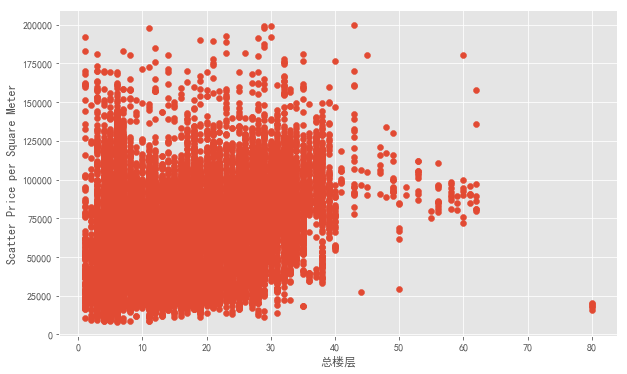

In [21]:
plt.scatter(x=train['TFLR'], y=train['PPS'])
plt.ylabel('Scatter Price per Square Meter')
plt.xlabel('总楼层')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

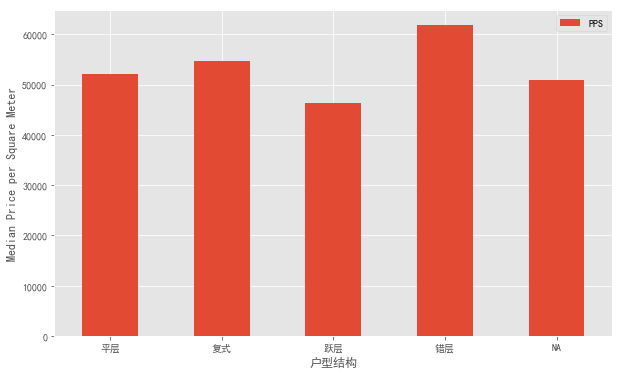

In [22]:
vstr_order = ['平层', '复式', '跃层', '错层', 'NA']
condition_pivot = train.pivot_table(index='VSTR', values='PPS', aggfunc=np.median)
condition_pivot.loc[vstr_order].plot(kind='bar')
plt.xlabel('户型结构')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

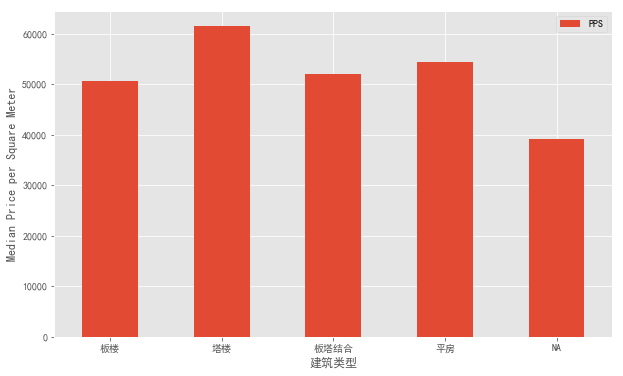

In [23]:
type_order = ['板楼', '塔楼', '板塔结合', '平房', 'NA']
condition_pivot = train.pivot_table(index='TYPE', values='PPS', aggfunc=np.median)
condition_pivot.loc[type_order].plot(kind='bar')
plt.xlabel('建筑类型')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

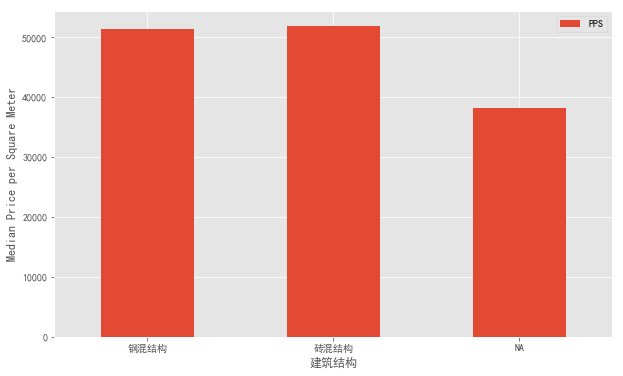

In [24]:
str_order = ['钢混结构', '砖混结构', 'NA']
condition_pivot = train.pivot_table(index='STR', values='PPS', aggfunc=np.median)
condition_pivot.loc[str_order].plot(kind='bar')
plt.xlabel('建筑结构')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

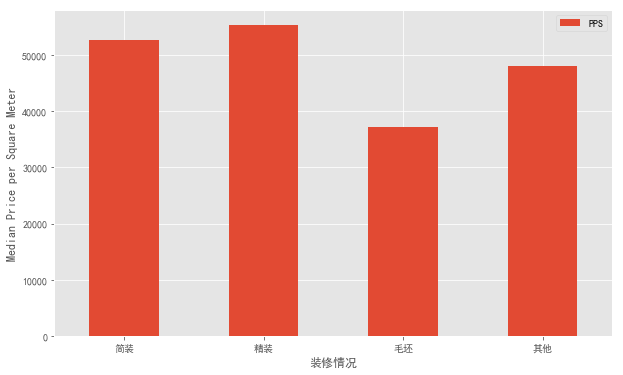

In [25]:
dec_order = ['简装', '精装', '毛坯', '其他']
condition_pivot = train.pivot_table(index='DEC', values='PPS', aggfunc=np.median)
condition_pivot.loc[dec_order].plot(kind='bar')
plt.xlabel('装修情况')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

Text(0.5,0,'梯户比例')

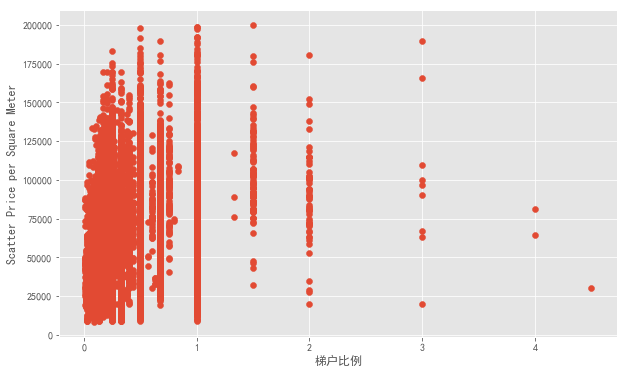

In [26]:
plt.scatter(x=train['RTO'], y=train['PPS'])
plt.ylabel('Scatter Price per Square Meter')
plt.xlabel('梯户比例')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

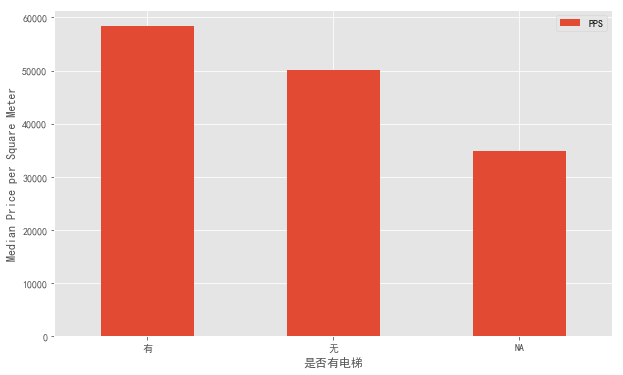

In [27]:
wlft_order = ['有', '无', 'NA']
condition_pivot = train.pivot_table(index='WLFT', values='PPS', aggfunc=np.median)
condition_pivot.loc[wlft_order].plot(kind='bar')
plt.xlabel('是否有电梯')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

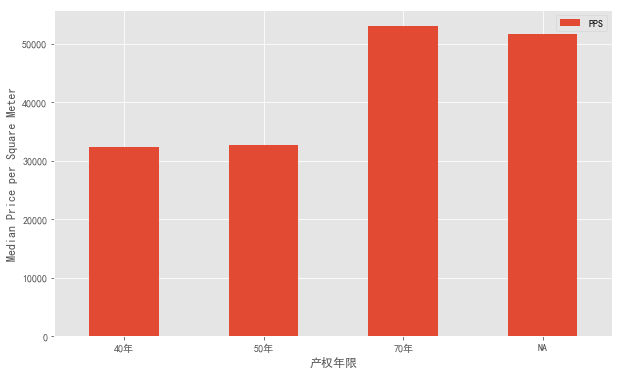

In [28]:
yright_order = ['40年', '50年', '70年', 'NA']
condition_pivot = train.pivot_table(index='YRIGHT', values='PPS', aggfunc=np.median)
condition_pivot.loc[yright_order].plot(kind='bar')
plt.xlabel('产权年限')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

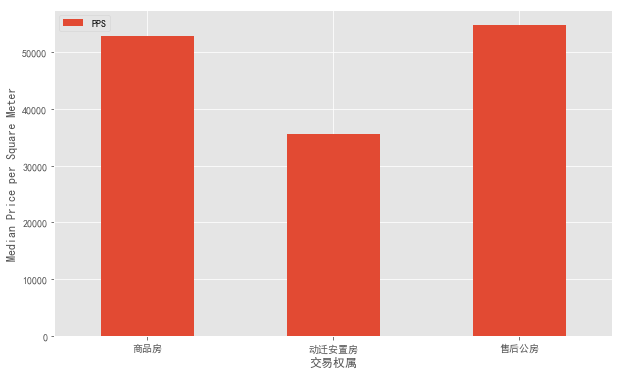

In [29]:
dright_order = ['商品房', '动迁安置房', '售后公房']
condition_pivot = train.pivot_table(index='DRIGHT', values='PPS', aggfunc=np.median)
condition_pivot.loc[dright_order].plot(kind='bar')
plt.xlabel('交易权属')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

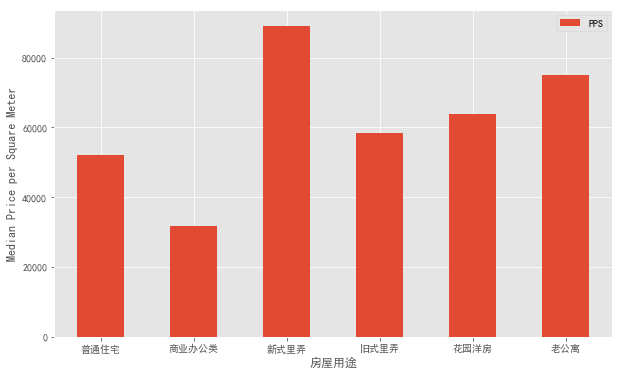

In [30]:
use_order = ['普通住宅', '商业办公类', '新式里弄', '旧式里弄', '花园洋房', '老公寓']
condition_pivot = train.pivot_table(index='USE', values='PPS', aggfunc=np.median)
condition_pivot.loc[use_order].plot(kind='bar')
plt.xlabel('房屋用途')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

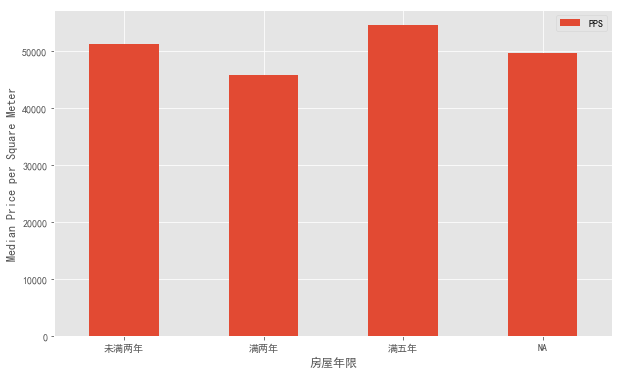

In [31]:
ycondo_order = ['未满两年', '满两年', '满五年', 'NA']
condition_pivot = train.pivot_table(index='YCONDO', values='PPS', aggfunc=np.median)
condition_pivot.loc[ycondo_order].plot(kind='bar')
plt.xlabel('房屋年限')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

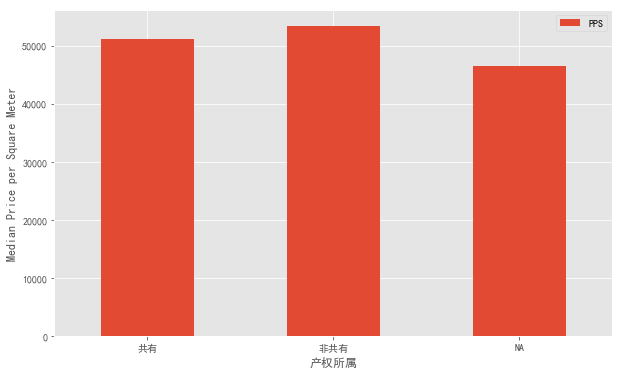

In [32]:
cright_order = ['共有', '非共有', 'NA']
condition_pivot = train.pivot_table(index='CRIGHT', values='PPS', aggfunc=np.median)
condition_pivot.loc[cright_order].plot(kind='bar')
plt.xlabel('产权所属')
plt.ylabel('Median Price per Square Meter')
plt.xticks(rotation=0)

In [33]:
X = pd.read_csv('C:\\Users\\BOWEN-8700-1080\\Desktop\\result\\sale\\sale-breakdown-encoded.csv')

In [34]:
Y = np.log(X.PPS)
# Y = X.PPS
X = X.drop(['PPS', 'ID'], axis=1)

In [35]:
lr = linear_model.LinearRegression()

In [36]:
X["METRO"] = X["METRO"].fillna(0)
X["VSTR"] = X["VSTR"].fillna(0)
X["TYPE"] = X["TYPE"].fillna(0)
X["EAST"] = X["EAST"].fillna(2)
X["SOUTH"] = X["SOUTH"].fillna(2)
X["WEST"] = X["WEST"].fillna(2)
X["NORTH"] = X["NORTH"].fillna(2)
X["STR"] = X["STR"].fillna(0)
X["WLFT"] = X["WLFT"].fillna(0)
X["YRIGHT"] = X["YRIGHT"].fillna(0)
X["YCONDO"] = X["YCONDO"].fillna(0)
X["CRIGHT"] = X["CRIGHT"].fillna(0)

In [37]:
model = lr.fit(X, Y)

In [38]:
model.score(X, Y)

0.24930697930878276

In [ ]:
np.median(X.PPS)